<a href="https://colab.research.google.com/github/ArtemOsokin/psskad_mgpu_course/blob/main/PW/PW2/PW_02_Osokin_A_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Установка необходимых библиотек**

In [1]:
pip install requests pandas matplotlib

**2. Импортирование библиотек**

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

**3. Получение данных с World Bank API**

In [3]:
url = 'https://api.worldbank.org/v2/country/all/indicator/EN.ATM.CO2E.KT?format=json&date=2010:2020'
response = requests.get(url)
data = response.json()

In [4]:
df = pd.json_normalize(data[1])
df.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2020,544952.5030,,,0,EN.ATM.CO2E.KT,CO2 emissions (kt),ZH,Africa Eastern and Southern
1,AFE,2019,610723.5000,,,0,EN.ATM.CO2E.KT,CO2 emissions (kt),ZH,Africa Eastern and Southern
2,AFE,2018,598720.9575,,,0,EN.ATM.CO2E.KT,CO2 emissions (kt),ZH,Africa Eastern and Southern
3,AFE,2017,590905.4820,,,0,EN.ATM.CO2E.KT,CO2 emissions (kt),ZH,Africa Eastern and Southern
4,AFE,2016,580219.2420,,,0,EN.ATM.CO2E.KT,CO2 emissions (kt),ZH,Africa Eastern and Southern


**4. Анализ полученных данных**

In [5]:
df_filtered = df[df['countryiso3code'] == 'AFE']
df_filtered = df_filtered[['date', 'value']].dropna()
df_filtered.columns = ['Year', 'CO2 Emissions (kt)']
df_filtered.head()

,Year,CO2 Emissions (kt)
0,2020,544952.5030
1,2019,610723.5000
2,2018,598720.9575
3,2017,590905.4820
4,2016,580219.2420


**5. Получение экономических данных**

In [6]:
url_gdp = 'https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?format=json&date=2010:2020'
response_gdp = requests.get(url_gdp)
data_gdp = response_gdp.json()
df_gdp = pd.json_normalize(data_gdp[1])
df_gdp.head()

,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
0,AFE,2020,9.290741e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
1,AFE,2019,1.006527e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
2,AFE,2018,1.012719e+12,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
3,AFE,2017,9.401055e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern
4,AFE,2016,8.298300e+11,,,0,NY.GDP.MKTP.CD,GDP (current US$),ZH,Africa Eastern and Southern


**6. Объединение экологических и экономических данных**

In [7]:
merged_df = pd.merge(df_filtered, df_gdp[['date', 'value']], left_on='Year', right_on='date')
merged_df.drop(columns=['date'], inplace=True)
merged_df.columns = ['Year', 'CO2 Emissions (kt)', 'GDP']
print(merged_df.head())

   Year  CO2 Emissions (kt)           GDP
0  2020          544952.503  9.290741e+11
1  2020          544952.503  7.871467e+11
2  2020          544952.503  2.576553e+12
3  2020          544952.503  3.137803e+10
4  2020          544952.503  1.665817e+12


**7. Визуализация и анализ данных**

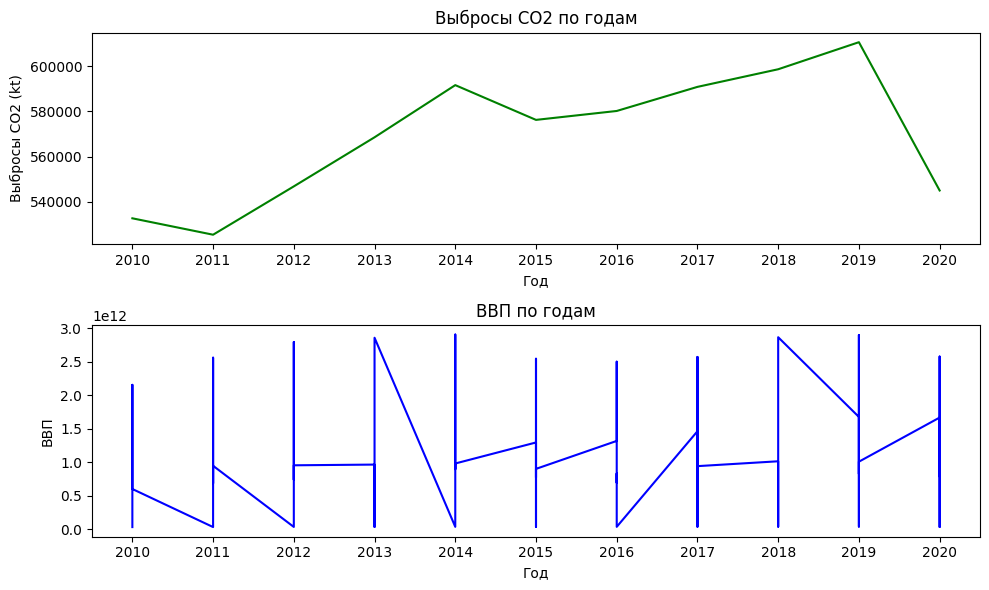

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
merged_df = merged_df.sort_values(by='Year')

plt.subplot(2, 1, 1)
plt.plot(merged_df['Year'], merged_df['CO2 Emissions (kt)'], label='CO2 Emissions (kt)', color='green')
plt.title('Выбросы CO2 по годам')
plt.xlabel('Год')
plt.ylabel('Выбросы CO2 (kt)')

plt.subplot(2, 1, 2)
plt.plot(merged_df['Year'], merged_df['GDP'], label='GDP', color='blue')
plt.title('ВВП по годам')
plt.xlabel('Год')
plt.ylabel('ВВП')

plt.tight_layout()
plt.show()